# **Implementation of all modules of a Dynamic (with arbitrary number of hidden layers) MLP**

## 1 - Import packages

In [0]:
# Necessary package: numpy
import numpy as np

## 2 - MLP Class

In [0]:
# Implementation of the MLP class
class MLP:

    def __init__(self):
        '''
        Initialize the MLP
        
        Attributes:       
        - Parameters: dictionary containing weights and biases
        - NumberLayers: number of layers of the MLP
        '''
        
        self.parameters = {}
        self.numberLayers = 0
	
    def initialize_parameters_layer(self, numberNeuronsPreviousLayer, numberNeuronsCurrentLayer, numberLayer):
        '''
        Initialize the weights and biases of a layer
        
        Arguments:
        - numberNeuronsPreviousLayer
        - numberNeuronsCurrentLayer
        - numberLayer: number of the current layer
        '''

        # Weights initialization -> 2015 by He et al (similar to Xavier initialization)
        W_layer = np.random.randn(numberNeuronsCurrentLayer, numberNeuronsPreviousLayer)*np.sqrt(2/numberNeuronsPreviousLayer)
		
        # Biases initialization -> array of zeros
        b_layer = np.zeros(shape=(numberNeuronsCurrentLayer, 1))
        
        # Add the weights and biases in the parameters dict
        self.parameters['W' + str(numberLayer)] = W_layer
        self.parameters['b' + str(numberLayer)] = b_layer
	
    def create_layer(self, numberNeuronsLayer):
        '''
        Create a layer in the MLP
        
        Argument:
        - numberNeuronsLayer: number of neurons of the created layer
        '''

        # Hidden Layer or Output Layer
        if self.numberLayers > 0:
            self.initialize_parameters_layer(self.numberNeuronsPreviousLayer, numberNeuronsLayer, self.numberLayers)
			
        self.numberNeuronsPreviousLayer = numberNeuronsLayer
        self.numberLayers += 1
		
    def forward_propagation(self, X):
        """
        Implement forward propagation

        Argument:
        - X: input data

        Returns:
        - AL: activation of the output layer
        - cache: dict containing activation potential and activation of each layer to compute the gradients in the back-propagation stage
        """

        # Dict cache
        cache = {}

        for layer in range(1,self.numberLayers):
            # Recover parameters
            W_layer = self.parameters['W' + str(layer)]
            b_layer = self.parameters['b' + str(layer)]
			
			      # Activation Potential
            if layer == 1: # Compute linear activation from the input layer to the first hidden layer
                Z = np.dot(W_layer, X.T) + b_layer
            else: # Compute linear activation from some hidden layer to a hidden layer or the output layer
                Z = np.dot(W_layer, cache['A' + str(layer - 1)]) + b_layer
			
            # Activation of the layer -> execute activation Function
            A = self.relu(Z)
			
			      # Stores values in the cache
            cache['Z' + str(layer)] = Z
            cache['A' + str(layer)] = A
         
        # Activation of the output layer
        AL = cache['A' + str(layer)]
        
        return AL, cache
		
    def back_propagation(self, cache, X, Y):
        """
        Implement the backward propagation

        Arguments:
        - cache: dict containing activation potential and activation of each layer
        - AL: output of the forward propagation (activation of the output layer)
        - Y: true "label" vector
        
        Returns:
        - deltas: dict containing deltas of each layer (weights and biases)
        """
        
        # Dict deltas
        deltas = {}
		
		    # Number of examples
        m = X.shape[1]

		
        # Backward propagation: compute deltas for the neurons of all layers #	
       
		
		    ## Compute error of the output layer (value obtained - desired value)
        dZ_output_layer = cache['A' + str(self.numberLayers - 1)] - Y.T
		
		    ## Delta for the output layer weights: error * derivative_function(output value) * input value(output of the previous layer)
        dW_output_layer = (1 / m) * -1 * np.dot(np.multiply(dZ_output_layer, self.relu_derivative(cache['A' + str(self.numberLayers - 1)])), cache['A' + str(self.numberLayers - 2)].T)
		
		    ## Delta for the output layer bias
        db_output_layer = (1 / m) * -1 * np.sum(dZ_output_layer, axis=1, keepdims=True)
		
        dZ_previous_layer = dZ_output_layer
		
        deltas['dW' + str(self.numberLayers - 1)] = dW_output_layer
        deltas['db' + str(self.numberLayers - 1)] = db_output_layer
		
        for layer in reversed(range(1,self.numberLayers - 1)):	

			      ## Gradient of the hidden layer
            dZ_hidden_layer = np.multiply(np.dot(self.parameters['W' + str(layer + 1)].T, dZ_previous_layer), self.relu_derivative(cache['A' + str(layer)]))
		
		        ## Delta for the hidden layer weights
            if layer == 1:
                dW_hidden_layer = (1 / m) * -1 * np.dot(dZ_hidden_layer, X)
            else:
                dW_hidden_layer = (1 / m) * -1 * np.dot(dZ_hidden_layer, cache['A' + str(layer-1)].T)
		
		        ## Delta for the hidden layer bias
            db_hidden_layer = (1 / m) * -1 * np.sum(dZ_hidden_layer, axis=1, keepdims=True)
			
            dZ_previous_layer = dZ_hidden_layer

            deltas['dW' + str(layer)] = dW_hidden_layer
            deltas['db' + str(layer)] = db_hidden_layer
		
		    #

        return deltas
		
    def update_parameters(self, deltas, learning_rate=0.1, momentum=1):
        """
        Update parameters using gradient descent

        Arguments:
        parameters -- python dictionary containing your parameters 
        grads -- python dictionary containing your gradients, output of L_model_backward

        Returns:
        parameters -- python dictionary containing your updated parameters 
                      parameters["W" + str(l)] = ... 
                      parameters["b" + str(l)] = ...
        """
        
        # Dict of the new parameters (updated weights and biases)
        new_parameters = {}
		
        # Update each parameter (weights and biases)
        for layer in range(1,self.numberLayers):
            new_parameters['W' + str(layer)] = self.parameters['W' + str(layer)] + (learning_rate * deltas['dW' + str(layer)])
            new_parameters['b' + str(layer)] = self.parameters['b' + str(layer)] + (learning_rate * deltas['db' + str(layer)])
			
        self.parameters = new_parameters
		
    def cost_function_mse(self, AL, Y):
        """
        Implement the mean squared error (mse) cost function

        Arguments:
        - AL: output of the forward propagation (label predictions)
        - Y: true "label" vector

        Returns:
        - mse: error
        """
        
        Y = Y.T
        
        # Number of examples
        m = Y.shape[1]        
        
        # Compute mean squared error (mse)
        mse = np.divide(np.sum(np.power(np.subtract(Y, AL), 2)), m)
    
        # Assert that is a float value
        assert(isinstance(mse, float))
        
        return mse
			
    def training_mlp_any_layers_with_mse(self, X, Y, learning_rate=0.1, epsilon=1e-15):
        """
        Implement the training stage of the MLP based on MSE

        Arguments:
        - X: input data
        - Y: true "label" vector
        - learning_rate: used to measure update parameters
        - epsilon: precision to stop training

        """
        
        current_mse_cost = 0
        
        # Loop
        while True:
		
            # MSE of the last epoch
            previous_mse_cost = current_mse_cost
             
            # Forward propagation
            A2, cache = self.forward_propagation(X)
			
            # Back-propagation
            deltas = self.back_propagation(cache, X, Y)
			
            # Compute MSE of this epoch
            current_mse_cost = self.cost_function_mse(A2, Y)
     
            # Update parameters
            self.update_parameters(deltas, learning_rate)
			
            print('MSE: ', current_mse_cost)
			
            # Stop when mse between two consecutive epochs is less or equal than an epsilon
            if np.abs(current_mse_cost - previous_mse_cost) <= epsilon:
                break
              
    def training_mlp_any_layers_with_number_iterations(self, X, Y, number_iterations=100000, learning_rate=0.1, epsilon=1e-15):
        """
        Implement the training stage of the MLP based on number of iterations

        Arguments:
        - X: input data
        - Y: true "label" vector
        - number_iterations: number of iterations used to train the MLP
        - learning_rate: used to measure update parameters
        - epsilon: precision to stop training

        """
        
        current_mse_cost = 0
        
        # Loop
        for i in range(number_iterations):
		
            # MSE of the last epoch
            previous_mse_cost = current_mse_cost
             
            # Forward propagation
            AL, cache = self.forward_propagation(X)
			
            # Back-propagation
            deltas = self.back_propagation(cache, X, Y)
			
            # Compute MSE of this epoch
            current_mse_cost = self.cost_function_mse(AL, Y)
     
            # Update parameters
            self.update_parameters(deltas, learning_rate)
			
            print('Iteration: ', i, ' - MSE: ', current_mse_cost)

    def prediction(self, X):
        """
        Implement the test stage of the MLP

        Arguments:
        - X: input data

        Returns:
        - predictions: label predictions of the mlp
        """
        
        # Compute the predictions
        A2, cache = self.forward_propagation(X)
        predictions = A2
        
        return predictions
      
    def compute_accuracy(self, X, Y):
        """
        Compute the accuracy of the MLP

        Arguments:
        - X: input data
        - Y: true "label" vector

        Returns:
        - accuracy
        """
        
        # Compute the predictions
        predictions = self.prediction(X)
        
        # Round the data (example: [0, 0.90, 0.1] to [0, 1, 0])
        rounded_predictions = np.round(predictions, decimals=0).T

        # Compute correct predictions
        correct_predictions = 0

        for i in range(predictions.shape[0]):
            if (rounded_predictions[i] == Y[i]).all():
                correct_predictions += 1

        # Compute accuracy
        accuracy = (correct_predictions / predictions.shape[0]) * 100

        return accuracy

		
    # Some activations functions and derivatives
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self,x): # x is already the sigmoid value
        return x * (1.0 - x)
		
    def relu(self,x):
        return np.maximum(x, 0, x)
		
    def relu_derivative(self,x):
        return np.greater(x, 0).astype(int)

## 3 - Examples of how to use the MLP

In [0]:
### SOME EXAMPLES ##

# OR EXAMPLE
def mlp_or():

    mlp = MLP()
    
    # Create layers
    mlp.create_layer(2) # Input layer
    mlp.create_layer(10) # 1st hidden layer
    mlp.create_layer(1) # output layer

    # Data
    inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
    labels = np.array([[0],[1],[1],[1]])

    # Training the MLP
    #mlp.training_mlp_any_layers_with_mse(inputs, labels) # with mse
    mlp.training_mlp_any_layers_with_number_iterations(inputs, labels, 2000)
    
    # Test the MLP
    predictions = mlp.prediction(inputs)
    
    print('NN parameters: ', mlp.parameters)
    print('Test: ', predictions)

# AND EXAMPLE
def mlp_and():

    mlp = MLP()

    # Create layers
    mlp.create_layer(2) # Input layer
    mlp.create_layer(10) # 1st hidden layer
    mlp.create_layer(1) # output layer

    # Data
    inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
    labels = np.array([[0],[0],[0],[1]])

    # Training the MLP
    #mlp.training_mlp_any_layers_with_mse(inputs, labels) # with mse
    mlp.training_mlp_any_layers_with_number_iterations(inputs, labels, 2000)
    
    # Test the MLP
    predictions = mlp.prediction(inputs)
    
    print('NN parameters: ', mlp.parameters)
    print('Test: ', predictions)


# XOR EXAMPLE	
def mlp_xor():

    mlp = MLP()
	
    # Create layers
    mlp.create_layer(2) # Input layer
    mlp.create_layer(20) # 1st hidden layer
    mlp.create_layer(1) # output layer

    # Data
    inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
    labels = np.array([[0],[1],[1],[0]])

    # Training the MLP
    mlp.training_mlp_any_layers_with_mse(inputs, labels) # with mse
    #mlp.training_mlp_any_layers_with_number_iterations(inputs, labels, 10000)
    
    # Test the MLP
    predictions = mlp.prediction(inputs)
    
    print('NN parameters: ', mlp.parameters)
    print('Test: ', predictions)

In [9]:
## OR EXAMPLE ##
mlp_or()

Iteration:  0  - MSE:  0.5375915892175865
Iteration:  1  - MSE:  0.4267339578829189
Iteration:  2  - MSE:  0.3231572872692095
Iteration:  3  - MSE:  0.29011023798576535
Iteration:  4  - MSE:  0.17163466282846257
Iteration:  5  - MSE:  0.11230308956510993
Iteration:  6  - MSE:  0.07996639979804965
Iteration:  7  - MSE:  0.06201819644823027
Iteration:  8  - MSE:  0.0507600619683916
Iteration:  9  - MSE:  0.04326724900695817
Iteration:  10  - MSE:  0.037867679853619496
Iteration:  11  - MSE:  0.033653073411780005
Iteration:  12  - MSE:  0.03018534108100518
Iteration:  13  - MSE:  0.027222095047594215
Iteration:  14  - MSE:  0.024625380191704797
Iteration:  15  - MSE:  0.022313512821843864
Iteration:  16  - MSE:  0.02023543318618423
Iteration:  17  - MSE:  0.018357004174499158
Iteration:  18  - MSE:  0.016674395056898654
Iteration:  19  - MSE:  0.015153713516567942
Iteration:  20  - MSE:  0.01375897273129511
Iteration:  21  - MSE:  0.0125063717457449
Iteration:  22  - MSE:  0.0113480315810

In [10]:
## AND EXAMPLE ##
mlp_and()

Iteration:  0  - MSE:  0.25
Iteration:  1  - MSE:  0.2508407640526033
Iteration:  2  - MSE:  0.2531707271472295
Iteration:  3  - MSE:  0.25696332021293455
Iteration:  4  - MSE:  0.2633748962081262
Iteration:  5  - MSE:  0.2700921740057716
Iteration:  6  - MSE:  0.27724421351475836
Iteration:  7  - MSE:  0.28451786959765085
Iteration:  8  - MSE:  0.2920125128384454
Iteration:  9  - MSE:  0.29973430529504913
Iteration:  10  - MSE:  0.26969158827646394
Iteration:  11  - MSE:  0.2110652163693893
Iteration:  12  - MSE:  0.17440683092881584
Iteration:  13  - MSE:  0.1487277730381099
Iteration:  14  - MSE:  0.12909374753757766
Iteration:  15  - MSE:  0.11314163876899383
Iteration:  16  - MSE:  0.10069505050785008
Iteration:  17  - MSE:  0.0910731284710447
Iteration:  18  - MSE:  0.08238924215950968
Iteration:  19  - MSE:  0.07452581652861398
Iteration:  20  - MSE:  0.06736591443924705
Iteration:  21  - MSE:  0.060856662253209556
Iteration:  22  - MSE:  0.054936658876916386
Iteration:  23  - M

In [11]:
## XOR EXAMPLE ##
mlp_xor()

MSE:  0.5
MSE:  0.5029125588876575
MSE:  0.5110270375625194
MSE:  0.5234902054869262
MSE:  0.4915866105738115
MSE:  0.3961429356849516
MSE:  0.3811296330617661
MSE:  0.3913726348407239
MSE:  0.3991842287469618
MSE:  0.4073748727623776
MSE:  0.4155238684775136
MSE:  0.4236421387850836
MSE:  0.43169775493599594
MSE:  0.43966909231713597
MSE:  0.4475375767261317
MSE:  0.4438405038519079
MSE:  0.30344379607196353
MSE:  0.24841763791564542
MSE:  0.22097248197961983
MSE:  0.20457565411186465
MSE:  0.19337380193264211
MSE:  0.18438927584172915
MSE:  0.17651535687561895
MSE:  0.1692778714280914
MSE:  0.16246545429576628
MSE:  0.15597797943004774
MSE:  0.14976325597733323
MSE:  0.14379036304085163
MSE:  0.1380383389290326
MSE:  0.13290946390483416
MSE:  0.12794543579412618
MSE:  0.12317160323941573
MSE:  0.1185725098678238
MSE:  0.11414177331442214
MSE:  0.10995893988862437
MSE:  0.10581396723993852
MSE:  0.10180647798501555
MSE:  0.09792761562362509
MSE:  0.09417073536054942
MSE:  0.0905406324

## 4 - Using MNIST dataset and comparing with a Keras MLP

### 4.1 - Getting Data

In [12]:
# Getting MNIST training and test data
from keras.datasets import mnist

## Load data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


### 4.2 - Plotting some data examples

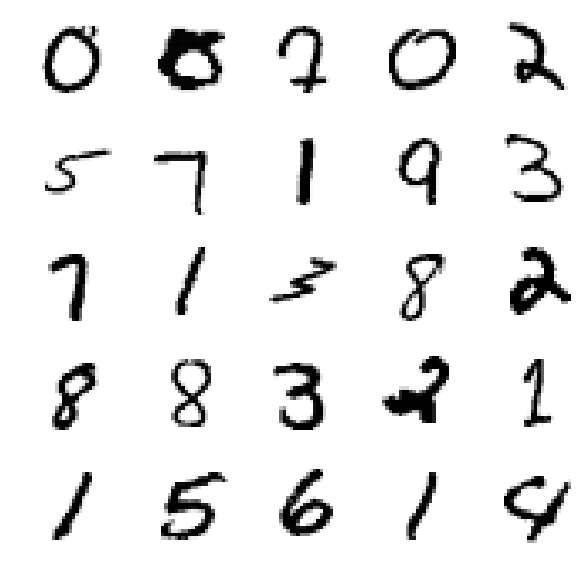

In [13]:
# Plotting some input data
import matplotlib.pyplot as plt
import numpy as np

fig, axes1 = plt.subplots(5,5,figsize=(10,10))
for j in range(5):
    for k in range(5):
        i = np.random.choice(range(len(train_images)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(train_images[i:i+1][0], interpolation='nearest')

In [14]:
# Showing some labels data
print(train_labels) # raw output

[5 0 4 ... 5 6 8]


### 4.3 - Preprocessing the data

In [0]:
from keras.utils import to_categorical

# Reshaping data to (60000, 784): 60000 examples and input size of 784
train_images = train_images.reshape((60000, 784))
test_images = test_images.reshape((10000, 784))

# Normalizing data (pixels with values between 0 and 1)
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# One-hot-enconding the output
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [16]:
train_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [17]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

### 4.4 - Training a Keras MLP

In [0]:
# Instantiating a small mlp
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(784, activation='relu', input_shape=(784,)))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(10, activation='relu'))

In [19]:
# Training the mlp
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=20, batch_size=64)

Epoch 1/20
60000/60000 [==============================] - 22s 359us/step - loss: 0.0608 - acc: 0.5873
Epoch 2/20
60000/60000 [==============================] - 21s 357us/step - loss: 0.0337 - acc: 0.8416
Epoch 3/20
60000/60000 [==============================] - 21s 351us/step - loss: 0.0271 - acc: 0.8790
Epoch 4/20
60000/60000 [==============================] - 21s 352us/step - loss: 0.0240 - acc: 0.8940
Epoch 5/20
60000/60000 [==============================] - 23s 378us/step - loss: 0.0221 - acc: 0.9034
Epoch 6/20
60000/60000 [==============================] - 44s 728us/step - loss: 0.0207 - acc: 0.9097
Epoch 7/20
60000/60000 [==============================] - 21s 352us/step - loss: 0.0196 - acc: 0.9153
Epoch 8/20
60000/60000 [==============================] - 21s 353us/step - loss: 0.0187 - acc: 0.9202
Epoch 9/20
60000/60000 [==============================] - 21s 355us/step - loss: 0.0180 - acc: 0.9242
Epoch 10/20
60000/60000 [==============================] - 21s 351us/step - loss: 

### 4.5 - Testing Keras MLP

In [20]:
# Testing the mlp
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Keras MLP accuracy:', test_acc)

10000/10000 [==============================] - 3s 269us/step
Keras MLP accuracy: 0.9457


### 4.6 - Training our MLP

In [21]:
mlp = MLP()

# Create layers
mlp.create_layer(784) # Input layer
mlp.create_layer(1024) # 1st hidden layer
mlp.create_layer(10) # output layer

# Training the MLP
mlp.training_mlp_any_layers_with_number_iterations(train_images, train_labels, 100, 0.0075)

print('NN parameters: ', mlp.parameters)


Iteration:  0  - MSE:  1.2388274019483159
Iteration:  1  - MSE:  3.8881311895519186
Iteration:  2  - MSE:  1.673586402936628
Iteration:  3  - MSE:  0.934956568907638
Iteration:  4  - MSE:  1.0556430111112858
Iteration:  5  - MSE:  0.872623277643015
Iteration:  6  - MSE:  0.8071663432745624
Iteration:  7  - MSE:  0.7592621950571797
Iteration:  8  - MSE:  0.7277303000279642
Iteration:  9  - MSE:  0.7004466002328011
Iteration:  10  - MSE:  0.6713873589234428
Iteration:  11  - MSE:  0.6363126319373338
Iteration:  12  - MSE:  0.5913218038009119
Iteration:  13  - MSE:  0.5381900977064992
Iteration:  14  - MSE:  0.48729982633848057
Iteration:  15  - MSE:  0.4490480208232525
Iteration:  16  - MSE:  0.4210986524117614
Iteration:  17  - MSE:  0.3986883502030409
Iteration:  18  - MSE:  0.3797961709619248
Iteration:  19  - MSE:  0.3634903061540541
Iteration:  20  - MSE:  0.3492387092647927
Iteration:  21  - MSE:  0.3366029456056663
Iteration:  22  - MSE:  0.32536788066437905
Iteration:  23  - MSE:

### 4.7 - Testing our MLP

In [22]:
print('Our MLP Accuracy: ', mlp.compute_accuracy(test_images, test_labels))

Our MLP Accuracy:  80.0
